# TensorFlow 2.x - Multiclass Classification


## Dataset

IRIS dataset is used in this kernel to demonstrate the multiclass classification using `TensorFlow 2.x`. This dataset has 5 features, out of which 4 features are numeric features and 1 is a categorical feature. 

## 1. Import dependent libraries

In [37]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from sklearn import datasets



In [38]:
# Data file path
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data['species'] = iris.target_names[iris.target]

In [39]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 2. Preparing dataset

In [40]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [41]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

c:\Users\Dima\.conda\envs\myenv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dataset will be prepared by the tensorflow `from_tensor_slice()` method.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [43]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")

Train shape : (105, 4), Y Train : (105, 3)


In [44]:


def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [45]:
model = get_model()


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              5000      
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dense_14 (Dense)            (None, 300)               150300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [52]:
from dvclive import Live
from dvclive.keras import DVCLiveCallback

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, callbacks=[DVCLiveCallback(save_dvc_exp=True)])


#with Live() as live:
#    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, callbacks=[DVCLiveCallback(save_dvc_exp=True)])
#    model.save("mymodel")
#    live.log_artifact("mymodel", type="model")

Epoch 1/30
4/4 [==============================] - 0s 26ms/step - loss: 0.0345 - accuracy: 0.9810 - val_loss: 0.1795 - val_accuracy: 0.9556
Epoch 2/30
4/4 [==============================] - 0s 11ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.1601 - val_accuracy: 0.9556
Epoch 3/30
4/4 [==============================] - 0s 11ms/step - loss: 0.0254 - accuracy: 0.9905 - val_loss: 0.1807 - val_accuracy: 0.9556
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.1945 - val_accuracy: 0.9556
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.1727 - val_accuracy: 0.9556
Epoch 6/30
4/4 [==============================] - 0s 11ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.1808 - val_accuracy: 0.9556
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.0150 - accuracy: 0.9905 - val_loss: 0.1826 - val_accuracy: 0.9556
Epoch 8/30
4/4 [===========

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.1304 - accuracy: 0.9778


[0.13038760423660278, 0.9777777791023254]

## Performance Monitor

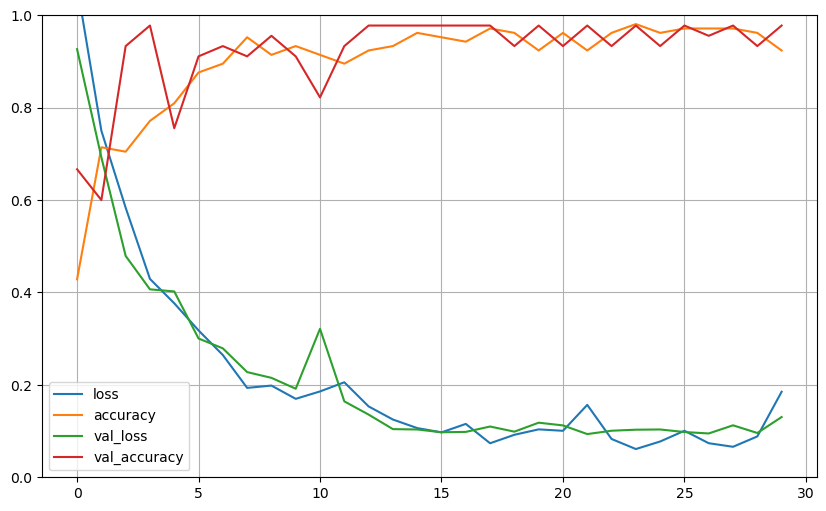

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 78ms/step
Actual data : [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
1
0
1
